# Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from collections import Counter

plt.rcParams["figure.figsize"] = (15,10)

covid_df = pd.read_csv('datasets/covid_DF.csv')
gp_df = pd.read_csv('datasets/gp_DF.csv')
mgr_df = pd.read_csv('datasets/mgr_DF.csv')

gp_text = gp_df["text"].tolist()
migranti_text = mgr_df["text"].tolist()

# Covid DF

Raw Covid table

In [2]:
covid_df = covid_df.drop(columns=['Unnamed: 0'])
covid_df['created'] = covid_df['created'].map(lambda x: str(x)[:-9])
covid_df['created'] = pd.to_datetime(covid_df['created'], format='%Y-%m-%d')
covid_df

,created,text,fav_count,retw_count,source,index
0,2021-11-09,"L'Europa è attesa da un inverno ""duro"" per l'a...",16,10,agenzia_ansa,0
1,2021-11-09,A Singapore le persone che non sono vaccinate ...,155,36,agenzia_ansa,0
2,2021-11-09,Torna a risalire in Italia la percentuale di p...,18,10,agenzia_ansa,0
3,2021-11-09,La Russia supera la soglia dei 1.200 morti in ...,29,11,agenzia_ansa,0
4,2021-11-08,FLASH | Sono 4.197 i positivi ai test Covid in...,18,8,agenzia_ansa,0
...,...,...,...,...,...,...
1984,2021-12-02,"#Covid, mappa Ecdc: tutta l'Ue è rossa, zone g...",1,2,qn_giorno,1
1985,2021-12-02,"#Covid #Israele sconsiglia viaggi all'estero, ...",1,0,qn_giorno,1
1986,2021-12-02,"#Covid, Vaccino AstraZeneca, team di esperti: ...",1,1,qn_giorno,1
1987,2021-12-02,Ammortizzatori e #cassa #Covid improvviso aume...,2,1,qn_giorno,1


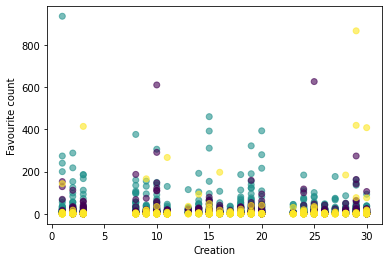

In [3]:
covid_df['created'] = pd.DatetimeIndex(covid_df['created']).day
plt.scatter(covid_df['created'],covid_df['fav_count'], c=covid_df['index'], alpha = 0.6)
plt.xlabel('Creation')
plt.ylabel('Favourite count')
plt.show()

Tweets count by Index

In [4]:
covid_index_count = covid_df.groupby('index').count()
covid_sx_count = covid_index_count['created'][-1]
covid_center_count = covid_index_count['created'][0]
covid_dx_count = covid_index_count['created'][1]
covid_index_count

,created,text,fav_count,retw_count,source
index,,,,,
-1,551,551,551,551,551
0,996,996,996,996,996
1,442,442,442,442,442


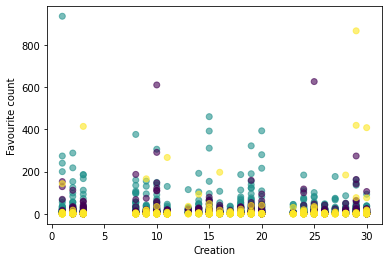

In [5]:
plt.scatter(covid_df['created'],covid_df['fav_count'], c=covid_df['index'], alpha = 0.6)
plt.xlabel('Creation')
plt.ylabel('Favourite count')
plt.show()

# Green Pass DF

Raw Green pass table

In [6]:
gp_df = gp_df.drop(columns=['Unnamed: 0'])
gp_df

,created,text,fav_count,retw_count,source,index
0,2021-11-09 10:42:50,"#NoGreenPass, stop alle manifestazioni all’int...",49,14,rainews,0
1,2021-11-09 08:56:29,RT @RaiStudio24: A. #Fontana (@FontanaPres) Pr...,0,1,rainews,0
2,2021-11-09 13:02:57,"No Green pass, stretta del Viminale: stop ai c...",36,6,mediasettgcom24,0
3,2021-11-09 13:00:08,"No Green pass, stretta del Viminale: stop ai c...",18,3,mediasettgcom24,0
4,2021-11-09 12:57:09,"No Green pass, stretta del Viminale: stop ai c...",17,1,mediasettgcom24,0
...,...,...,...,...,...,...
468,2021-12-02 07:28:18,Non controllavano il Green pass ai clienti sed...,8,0,gazzettino,1
469,2021-12-01 14:24:19,"Green pass, forze dell'ordine sui #bus per ver...",0,2,gazzettino,1
470,2021-12-03 13:14:39,Come ottenere il Super Green pass https://t.co...,0,0,qn_carlino,1
471,2021-12-02 13:14:23,"Green pass super, da quando vale e come si sca...",1,1,qn_carlino,1


Tweets count by Index

In [7]:
gp_index_count = gp_df.groupby('index').count()
gp_sx_count = gp_index_count['created'][-1]
gp_center_count = gp_index_count['created'][0]
gp_dx_count = gp_index_count['created'][1]
gp_index_count

,created,text,fav_count,retw_count,source
index,,,,,
-1,215,215,215,215,215
0,158,158,158,158,158
1,100,100,100,100,100


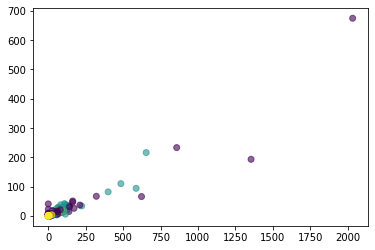

In [8]:
plt.scatter(gp_df['fav_count'],gp_df['retw_count'], c=gp_df['index'], alpha = 0.6)
plt.show()

## Migranti DF

Raw Migrants table

In [9]:
mgr_df = mgr_df.drop(columns=['Unnamed: 0'])
mgr_df

,created,text,fav_count,retw_count,source,index
0,2021-11-09 07:28:30,"La Germania esorta l'Unione europea ad ""agire""...",75,28,agenzia_ansa,0
1,2021-11-08 13:16:39,VIDEO | L'esodo dei migranti che ha tentato di...,25,16,agenzia_ansa,0
2,2021-11-09 09:19:21,Così la #Bielorussia porta i #migranti in Euro...,9,7,agenzia_italia,0
3,2021-11-08 17:13:53,La crisi al confine polacco con migliaia di #m...,15,9,agenzia_italia,0
4,2021-11-09 15:41:22,Ue: aggressione da regime illegittimo e disper...,18,8,rainews,0
...,...,...,...,...,...,...
219,2021-12-03 17:17:34,"Papa Francesco a Cipro: ""I lager ci sono anche...",22,3,repubblica,-1
220,2021-12-02 18:11:35,RT @eziomauro: Papa Francesco a Cipro e in Gre...,0,1,repubblica,-1
221,2021-12-03 09:54:41,Stati Uniti e Messico riattivano un programma ...,3,1,internazionale,-1
222,2021-12-03 08:51:44,"[VIDEO] ""Sulla crisi dei migranti serve più co...",3,1,ilfoglio_it,1


Tweets count by Index

In [10]:
mgr_index_count = mgr_df.groupby('index').count()
mgr_sx_count = mgr_index_count['created'][-1]
mgr_center_count = mgr_index_count['created'][0]
mgr_dx_count = mgr_index_count['created'][1]
mgr_index_count

,created,text,fav_count,retw_count,source
index,,,,,
-1,89,89,89,89,89
0,106,106,106,106,106
1,29,29,29,29,29


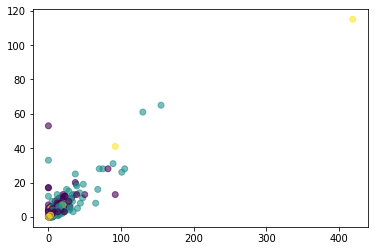

In [11]:
plt.scatter(mgr_df['fav_count'],mgr_df['retw_count'], c=mgr_df['index'], alpha = 0.6)
plt.show()

# ML stuff

## Covid

In [12]:
covid_text = covid_df["text"].tolist()
labels = covid_df['index']

train_data, test_data, train_labels, test_labels = train_test_split(covid_text, labels, test_size = 0.2, random_state = 1)

print("Training set: ",len(train_data))
print("Test set: ",len(test_data))

Training set:  1591
Test set:  398


In [13]:
counter = CountVectorizer()
counter.fit(train_data)
train_counts = counter.transform(train_data)
test_counts = counter.transform(test_data)

classifier = MultinomialNB()
classifier.fit(train_counts, train_labels)

predictions = classifier.predict(test_counts)
print("Classifier accuracy: ",accuracy_score(test_labels, predictions))
print("Accuracy test:")
print(confusion_matrix(test_labels, predictions))

Classifier accuracy:  0.6130653266331658
Accuracy test:
[[ 43  69   6]
 [ 12 176   5]
 [ 22  40  25]]


In [14]:
tweet = 'Il Covid si sta propagando in Europa'
tweet2 = 'Il governo dovrebbe fare qualcosa!'
tweet3 = 'Le mascherine si sono rivelate un fallimento'
tweet_counts = counter.transform([tweet, tweet2, tweet3])
print("Predictions: ",classifier.predict(tweet_counts))
print("Predictions probability: ")
print(classifier.predict_proba(tweet_counts))

Predictions:  [ 0 -1  0]
Predictions probability: 
[[0.14623878 0.68398026 0.16978096]
 [0.46986719 0.20909275 0.32104006]
 [0.12629549 0.75382217 0.11988235]]


## GP

In [15]:
gp_text = gp_df["text"].tolist()
labels = gp_df['index']

train_data, test_data, train_labels, test_labels = train_test_split(gp_text, labels, test_size = 0.2, random_state = 1)

print("Training set: ",len(train_data))
print("Test set: ",len(test_data))

Training set:  378
Test set:  95


In [16]:
counter = CountVectorizer()
counter.fit(train_data)
train_counts = counter.transform(train_data)
test_counts = counter.transform(test_data)

classifier = MultinomialNB()
classifier.fit(train_counts, train_labels)

predictions = classifier.predict(test_counts)
print("Classifier accuracy: ",accuracy_score(test_labels, predictions))
print("Accuracy test:")
print(confusion_matrix(test_labels, predictions))

Classifier accuracy:  0.6105263157894737
Accuracy test:
[[39  2  5]
 [13 17  0]
 [15  2  2]]


In [17]:
tweet = 'Dovrebbero abolire il Green pass!'
tweet2 = 'La nuova certificazione ha creato problemi'
tweet3 = 'Il Green pass è la soluzione'
tweet_counts = counter.transform([tweet, tweet2, tweet3])
print("Predictions: ",classifier.predict(tweet_counts))
print("Predictions probability: ")
print(classifier.predict_proba(tweet_counts))

Predictions:  [-1 -1 -1]
Predictions probability: 
[[0.66591653 0.23761629 0.09646719]
 [0.70891494 0.12517664 0.16590842]
 [0.73502933 0.20368916 0.06128151]]


## Merge

In [18]:
merge_df = pd.concat([covid_df, gp_df, mgr_df], axis=0)
#merge_df = merge_df.drop(columns=['Unnamed: 0'])

merge_text = merge_df["text"].tolist()
labels = merge_df['index']

train_data, test_data, train_labels, test_labels = train_test_split(merge_text, labels, test_size = 0.2, random_state = 1)

print("Training set: ",len(train_data))
print("Test set: ",len(test_data))

Training set:  2148
Test set:  538


In [19]:
merge_df_sx = merge_df[merge_df["index"]==-1]
merge_df_c = merge_df[merge_df["index"]==0]
merge_df_dx = merge_df[merge_df["index"]==1]

merge_text_sx = merge_df_sx["text"].tolist()
merge_text_c = merge_df_c["text"].tolist()
merge_text_dx = merge_df_dx["text"].tolist()

In [20]:
merge_index_count = merge_df.groupby('index').count()
merge_index_count

,created,text,fav_count,retw_count,source
index,,,,,
-1,855,855,855,855,855
0,1260,1260,1260,1260,1260
1,571,571,571,571,571


In [21]:
counter = CountVectorizer()
counter.fit(train_data)
train_counts = counter.transform(train_data)
test_counts = counter.transform(test_data)

classifier = MultinomialNB()
classifier.fit(train_counts, train_labels)

predictions = classifier.predict(test_counts)
print("Classifier accuracy: ",accuracy_score(test_labels, predictions))
print("Accuracy test:")
print(confusion_matrix(test_labels, predictions))

Classifier accuracy:  0.6152416356877324
Accuracy test:
[[ 79  86   9]
 [ 39 225   5]
 [ 23  45  27]]


In [22]:
tweet = 'Dovrebbero abolire il Green pass!'
tweet2 = 'Oggi sono stati riportati 500 nuovi casi di Covid'
tweet3 = 'Viva la destra!'
tweet_counts = counter.transform([tweet, tweet2, tweet3])
print("Predictions: ",classifier.predict(tweet_counts))
print("Predictions probability: ")
print(classifier.predict_proba(tweet_counts))

Predictions:  [-1  0  1]
Predictions probability: 
[[0.50993292 0.37016778 0.1198993 ]
 [0.04054372 0.87135224 0.08810405]
 [0.31829665 0.27790071 0.40380264]]


# Wordcount

Wordcount SX

In [23]:
emptySX = ''
walltextSX = emptySX.join(merge_text_sx)
splittedSX = walltextSX.split()
sx = Counter(splittedSX)
sx.most_common()

[('e', 332),
 ('di', 312),
 ('il', 307),
 ('in', 253),
 ('la', 226),
 ('i', 205),
 ('a', 202),
 ('per', 196),
 ('Green', 155),
 ('al', 136),
 ('del', 116),
 ('Covid', 107),
 ('non', 95),
 ('le', 84),
 ('un', 76),
 ('con', 74),
 ('è', 69),
 ('da', 69),
 ('casi', 65),
 ('dei', 63),
 ('No', 62),
 ('ma', 58),
 ('Covid,', 57),
 ('Pass', 56),
 ('migranti', 53),
 ('Pass,', 52),
 ('della', 51),
 ('pass', 48),
 ('si', 47),
 ('che', 45),
 ('via', 41),
 ('@eziomauro:', 41),
 ('[di', 41),
 ('ai', 40),
 ('tra', 40),
 ('morti', 39),
 ('anche', 38),
 ('più', 37),
 ('ha', 37),
 ('contagi', 36),
 ('bollettino', 35),
 ('nuovi', 35),
 ('vaccino', 34),
 ('chi', 33),
 ('sul', 33),
 ('una', 32),
 ('solo', 31),
 ('Italia', 31),
 ('positivi', 31),
 ('sui', 31),
 ('sono', 31),
 ('su', 30),
 ('pass,', 30),
 ('Covid:', 29),
 ('dal', 29),
 ('contro', 28),
 ('oggi', 28),
 ('come', 28),
 ('Super', 28),
 ('senza', 27),
 ('ecco', 26),
 ('alla', 25),
 ('vaccinati', 25),
 ('nuove', 23),
 ('nel', 22),
 ('governo', 22),


Wordcount Centro

In [24]:
emptyC = ''
walltextC = emptyC.join(merge_text_c)
splittedC = walltextC.split()
c = Counter(splittedC)
c.most_common()

[('in', 504),
 ('di', 369),
 ('e', 334),
 ('#covid', 274),
 ('a', 256),
 ('il', 227),
 ('per', 226),
 ('i', 214),
 ('la', 188),
 ('al', 142),
 ('Green', 137),
 ('del', 117),
 ('non', 115),
 ('è', 108),
 ('Covid', 98),
 ('da', 94),
 ('#Covid', 94),
 ('con', 94),
 ('pass', 89),
 ('le', 87),
 ('un', 82),
 ('oggi', 77),
 ('contagi', 74),
 ('ai', 73),
 ('casi', 73),
 ('dei', 69),
 ('della', 67),
 ('migranti', 61),
 ('vaccino', 59),
 ('su', 57),
 ('24', 56),
 ('pass,', 56),
 ('si', 53),
 ('positivi', 49),
 ('variante', 49),
 ('nuovi', 48),
 ('Italia', 47),
 ('morti', 45),
 ('più', 42),
 ('che', 40),
 ('nelle', 39),
 ('dal', 36),
 ('nel', 36),
 ('sono', 35),
 ('altri', 35),
 ('|', 34),
 ('dati', 34),
 ('tra', 34),
 ('dose', 33),
 ('ma', 33),
 ('anti', 33),
 ('anche', 33),
 ('una', 32),
 ('terza', 32),
 ('contro', 32),
 ('Italia,', 32),
 ('ultime', 31),
 ('ha', 30),
 ('sul', 30),
 ('no', 30),
 ('vax', 29),
 ('gli', 29),
 ('senza', 29),
 ('Covid,', 28),
 ('test', 28),
 ('Il', 28),
 ('tamponi', 

Wordcount DX

In [25]:
emptyDX = ''
walltextDX = emptyDX.join(merge_text_dx)
splittedDX = walltextDX.split()
dx = Counter(splittedDX)
dx.most_common()

[('e', 219),
 ('in', 209),
 ('il', 207),
 ('di', 198),
 ('per', 131),
 ('i', 120),
 ('la', 119),
 ('a', 115),
 ('del', 86),
 ('Covid', 71),
 ('al', 55),
 ('Green', 55),
 ('da', 54),
 ('le', 53),
 ('nuovi', 51),
 ('non', 48),
 ('dei', 48),
 ('è', 48),
 ('si', 47),
 ('un', 42),
 ('pass', 41),
 ('#Covid', 37),
 ('contagi', 35),
 ('ha', 32),
 ('bollettino', 30),
 ('con', 28),
 ('via', 27),
 ('che', 27),
 ('casi', 27),
 ('pass,', 27),
 ('sul', 26),
 ('più', 26),
 ('anche', 25),
 ('ma', 25),
 ('ai', 24),
 ('della', 23),
 ('oggi', 23),
 ('ricoveri', 23),
 ('novembre:', 22),
 ('positivi', 22),
 ('Covid,', 22),
 ('sono', 22),
 ('vax', 21),
 ('dati', 20),
 ('migranti', 20),
 ('una', 20),
 ('Veneto,', 19),
 ('contro', 19),
 ('ecco', 18),
 ('dal', 18),
 ('morti', 18),
 ('no', 18),
 ('vaccino', 18),
 ('Veneto', 18),
 ('Il', 17),
 ('come', 17),
 ('novembre', 17),
 ('solo', 17),
 ('Toscana', 16),
 ('24', 16),
 ('dopo', 16),
 ('nel', 16),
 ('zona', 16),
 ('alla', 15),
 ('No', 15),
 ('oggi,', 15),
 ('t

Wordcount recap

In [26]:
wcSX = {'Covid':254, 'pass':220, 'Green':165, 'migranti':69, 'casi':65, 'contagi':58, 'morti':55, 'Italia':54, 'bollettino':38, 'positivi':36}
wcC = {'Covid':185, 'pass':183, 'Green':146, 'Italia':100, 'oggi':96, 'contagi':90, 'casi':81, 'migranti':65, 'vaccino':63, 'positivi':53}
wcDX = {'Covid':144, 'pass':88, 'Green':58, 'contagi':58, 'novembre':50, 'Veneto':39, 'vax':33, 'bollettino':32, 'positivi':31, 'morti':30}

wcSum = {'Covid': 583, 'pass': 491, 'Green': 368, 'contagi': 206, 'Italia': 154, 'casi': 146, 'migranti': 134, 'positivi': 120, 'oggi': 96, 'morti': 85}

Creating Wordclouds based on political standings, overall included

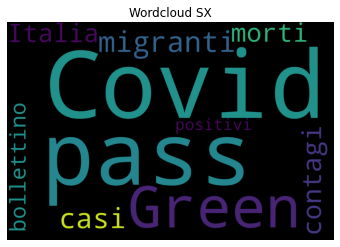

In [27]:
from wordcloud import WordCloud

wc_SX = WordCloud(background_color="black",width=3000,height=2000, max_words=10,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(wcSX)
plt.axis('off')
plt.title('Wordcloud SX')
plt.imshow(wc_SX)

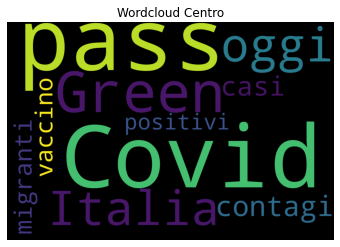

In [28]:
wc_C = WordCloud(background_color="black",width=3000,height=2000, max_words=10,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(wcC)
plt.axis('off')
plt.title('Wordcloud Centro')
plt.imshow(wc_C)

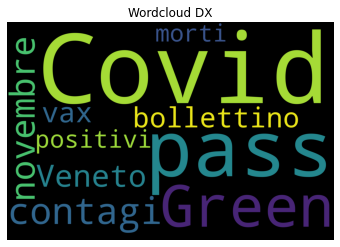

In [29]:
wc_DX = WordCloud(background_color="black",width=3000,height=2000, max_words=10,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(wcDX)
plt.axis('off')
plt.title('Wordcloud DX')
plt.imshow(wc_DX)

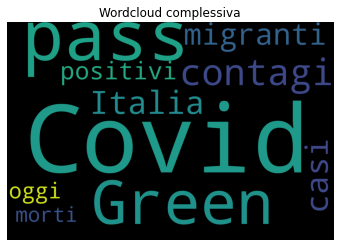

In [30]:
wc_Sum = WordCloud(background_color="black",width=3000,height=2000, max_words=10,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(wcSum)
plt.axis('off')
plt.title('Wordcloud complessiva')
plt.imshow(wc_Sum)

# Activity

Number of total Tweets by source

In [31]:
df_activity = pd.DataFrame(merge_df, columns=["source","index"])
merge_activity = df_activity.groupby('source').count()
merge_activity.sort_values(by=['source'], ascending=True)

,index
source,
adnkronos,430
agenzia_ansa,157
agenzia_italia,28
avvenire_nei,40
corriere,60
fattoquotidiano,138
gazzettino,185
huffpostitalia,127
ilfoglio_it,44


Total sum of Favourite counts by source

In [32]:
fc_activity = merge_df.groupby('source')["fav_count"].sum()
fc_activity

source
adnkronos           8320
agenzia_ansa        8767
agenzia_italia       210
avvenire_nei         958
corriere            2481
fattoquotidiano     3737
gazzettino           151
huffpostitalia      7976
ilfoglio_it          605
ilgiornale           436
ilmanifesto          345
ilmessaggeroit       980
ilpost               575
ilriformista         218
internazionale       183
lastampa            2432
laveritaweb         2345
libero_official     1887
mattinodinapoli      262
mediasettgcom24    13551
qn_carlino            29
qn_giorno             99
qn_lanazione          51
rainews              609
repubblica          3689
Name: fav_count, dtype: int64

In [33]:
fav_activity = fc_activity.tolist()
print(fav_activity)

[8320, 8767, 210, 958, 2481, 3737, 151, 7976, 605, 436, 345, 980, 575, 218, 183, 2432, 2345, 1887, 262, 13551, 29, 99, 51, 609, 3689]


Total sum of Retweet counts by source

In [34]:
rc_activity = merge_df.groupby('source')["retw_count"].sum()
rc_activity

source
adnkronos          3143
agenzia_ansa       2768
agenzia_italia      120
avvenire_nei        399
corriere            506
fattoquotidiano    1903
gazzettino           80
huffpostitalia     1956
ilfoglio_it         165
ilgiornale          120
ilmanifesto         156
ilmessaggeroit      535
ilpost              135
ilriformista        104
internazionale       74
lastampa            711
laveritaweb         871
libero_official     569
mattinodinapoli      66
mediasettgcom24    3590
qn_carlino           32
qn_giorno            41
qn_lanazione         30
rainews             266
repubblica         1335
Name: retw_count, dtype: int64

In [35]:
retw_activity = rc_activity.tolist()
print(retw_activity)

[3143, 2768, 120, 399, 506, 1903, 80, 1956, 165, 120, 156, 535, 135, 104, 74, 711, 871, 569, 66, 3590, 32, 41, 30, 266, 1335]


Retrieving followers, sources index and activity data for the big following table

In [36]:
followers_list = [{"adnkronos":578989, "agenzia_ansa":1700000, "agenzia_italia":241421, "avvenire_nei":101422, "corriere":2500000, "fattoquotidiano":2100000, "gazzettino":70693, "huffpostitalia":630162, "ilfoglio_it":251246, "ilgiornale":567738, "ilmanifesto":205146, "ilmessaggeroit": 494178, "ilpost":700184, "ilriformista":22699, "internazionale":1300000, "lastampa":1200000, "laveritaweb":175641, "libero_official":314275, "mattinodinapoli":275058, "mediasettgcom24":1300000, "qn_carlino":53983, "qn_giorno":15418, "qn_lanazione":60602, "rainews":1200000, "repubblica":3300000}]
fw_list = [578989,1700000,241421,101422,2500000,2100000,70693,630162,251246,567738,205146,494178,700184,22699,1300000,1200000,175641,314275,275058,1300000,53983,15418,60602,1200000,3300000]
index_q = [0,0,0,1,0,-1,1,-1,1,1,-1,-1,0,-1,-1,-1,1,1,0,0,1,1,1,0,-1]

In [37]:
merge_activity['fav_count sum'] = fav_activity
merge_activity['retw_count sum'] = retw_activity
merge_activity['followers count'] = fw_list
merge_activity.rename(columns = {'index':'tweet count'}, inplace = True)

In [38]:
interaction = []
for i in range(0,25):
    calc = (merge_activity['fav_count sum'][i]+merge_activity['retw_count sum'][i])/merge_activity['tweet count'][i]
    interaction.append(calc)

merge_activity['interaction'] = interaction
merge_activity['index'] = index_q

Activity report

In [39]:
merge_activity.sort_values(by=['interaction'], ascending=False)

,tweet count,fav_count sum,retw_count sum,followers count,interaction,index
source,,,,,,
laveritaweb,8,2345,871,175641,402.000000,1
huffpostitalia,127,7976,1956,630162,78.204724,-1
agenzia_ansa,157,8767,2768,1700000,73.471338,0
corriere,60,2481,506,2500000,49.783333,0
libero_official,51,1887,569,314275,48.156863,1
ilmanifesto,11,345,156,205146,45.545455,-1
mediasettgcom24,417,13551,3590,1300000,41.105516,0
fattoquotidiano,138,3737,1903,2100000,40.869565,-1
avvenire_nei,40,958,399,101422,33.925000,1


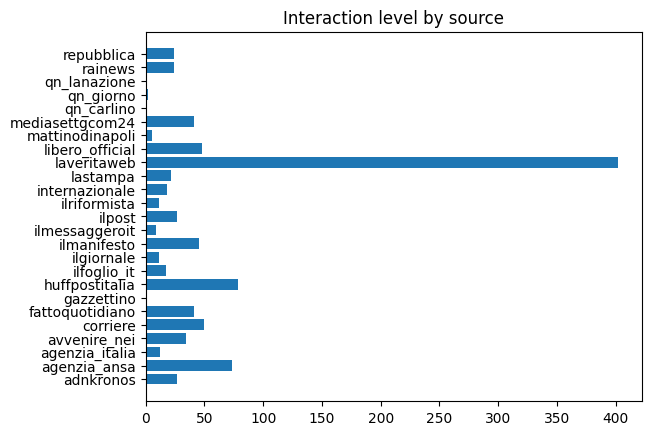

In [40]:
sources = sorted(list(merge_df['source'].unique()))
y = merge_activity['interaction']

plt.rcdefaults()
fig, ax = plt.subplots()

ax.barh(sources, y, align='center')

ax.set_xlabel('')
ax.set_title('Interaction level by source')

plt.show()

Activity report by Index

In [41]:
totSX = merge_activity[merge_activity["index"]==-1]
totC = merge_activity[merge_activity["index"]==0]
totDX = merge_activity[merge_activity["index"]==1]

In [42]:
totSX.sort_values(by=['interaction'], ascending=False)

,tweet count,fav_count sum,retw_count sum,followers count,interaction,index
source,,,,,,
huffpostitalia,127,7976,1956,630162,78.204724,-1
ilmanifesto,11,345,156,205146,45.545455,-1
fattoquotidiano,138,3737,1903,2100000,40.869565,-1
repubblica,210,3689,1335,3300000,23.923810,-1
lastampa,146,2432,711,1200000,21.527397,-1
internazionale,14,183,74,1300000,18.357143,-1
ilriformista,28,218,104,22699,11.500000,-1
ilmessaggeroit,181,980,535,494178,8.370166,-1


In [43]:
#print('Interaction mean: ',totSX['interaction'].mean())
#print('Interaction median: ',totSX['interaction'].median())

#print('Fav_count mean: ',totSX['fav_count sum'].mean())
#print('Fav_count median: ',totSX['fav_count sum'].median())

#print('Retw_count mean: ',totSX['retw_count sum'].mean())
#print('Retw_count median: ',totSX['retw_count sum'].median())

In [44]:
totC.sort_values(by=['interaction'], ascending=False)

,tweet count,fav_count sum,retw_count sum,followers count,interaction,index
source,,,,,,
agenzia_ansa,157,8767,2768,1700000,73.471338,0
corriere,60,2481,506,2500000,49.783333,0
mediasettgcom24,417,13551,3590,1300000,41.105516,0
adnkronos,430,8320,3143,578989,26.658140,0
ilpost,27,575,135,700184,26.296296,0
rainews,37,609,266,1200000,23.648649,0
agenzia_italia,28,210,120,241421,11.785714,0
mattinodinapoli,64,262,66,275058,5.125000,0


In [45]:
#print('Interaction mean: ',totC['interaction'].mean())
#print('Interaction median: ',totC['interaction'].median())

#print('Fav_count mean: ',totC['fav_count sum'].mean())
#print('Fav_count median: ',totC['fav_count sum'].median())

#print('Retw_count mean: ',totC['retw_count sum'].mean())
#print('Retw_count median: ',totC['retw_count sum'].median())

In [46]:
totDX.sort_values(by=['interaction'], ascending=False)

,tweet count,fav_count sum,retw_count sum,followers count,interaction,index
source,,,,,,
laveritaweb,8,2345,871,175641,402.000000,1
libero_official,51,1887,569,314275,48.156863,1
avvenire_nei,40,958,399,101422,33.925000,1
ilfoglio_it,44,605,165,251246,17.500000,1
ilgiornale,50,436,120,567738,11.120000,1
qn_giorno,65,99,41,15418,2.153846,1
gazzettino,185,151,80,70693,1.248649,1
qn_lanazione,86,51,30,60602,0.941860,1
qn_carlino,82,29,32,53983,0.743902,1


In [47]:
#print('Interaction mean: ',totDX['interaction'].mean())
#print('Interaction median: ',totDX['interaction'].median())

#print('Fav_count mean: ',totDX['fav_count sum'].mean())
#print('Fav_count median: ',totDX['fav_count sum'].median())

#print('Retw_count mean: ',totDX['retw_count sum'].mean())
#print('Retw_count median: ',totDX['retw_count sum'].median())

In [48]:
sumDF = {'Tweet count sum': [totSX['tweet count'].sum(),totC['tweet count'].sum(),totDX['tweet count'].sum()], 'Fav count sum': [totSX['fav_count sum'].sum(),totC['fav_count sum'].sum(),totDX['fav_count sum'].sum()], 'Retw count sum': [totSX['retw_count sum'].sum(),totC['retw_count sum'].sum(),totDX['retw_count sum'].sum()], 'Followers count': [totSX['followers count'].sum(),totC['followers count'].sum(),totDX['followers count'].sum()], 'Index':[-1,0,1]}
df1 = pd.DataFrame(data=sumDF)
df1

,Tweet count sum,Fav count sum,Retw count sum,Followers count,Index
0,855,19560,6774,9252185,-1
1,1220,34775,10594,8495652,0
2,611,6561,2307,1611018,1


In [49]:
meansDF = {'Fav count mean': [totSX['fav_count sum'].mean(),totC['fav_count sum'].mean(),totDX['fav_count sum'].mean()], 'Retw count mean': [totSX['retw_count sum'].mean(),totC['retw_count sum'].mean(),totDX['retw_count sum'].mean()], 'Interaction mean': [totSX['interaction'].mean(),totC['interaction'].mean(),totDX['interaction'].mean()], 'Index':[-1,0,1]}
df2 = pd.DataFrame(data=meansDF)
df2

,Fav count mean,Retw count mean,Interaction mean,Index
0,2445.000,846.750000,31.037282,-1
1,4346.875,1324.250000,32.234248,0
2,729.000,256.333333,57.532236,1


In [50]:
mediansDF = {'Fav count median': [totSX['fav_count sum'].median(),totC['fav_count sum'].median(),totDX['fav_count sum'].median()], 'Retw count median': [totSX['retw_count sum'].median(),totC['retw_count sum'].median(),totDX['retw_count sum'].median()], 'Interaction median': [totSX['interaction'].median(),totC['interaction'].median(),totDX['interaction'].median()], 'Index':[-1,0,1]}
df3 = pd.DataFrame(data=mediansDF)
df3

,Fav count median,Retw count median,Interaction median,Index
0,1706.0,623.0,22.725603,-1
1,1545.0,386.0,26.477218,0
2,436.0,120.0,11.120000,1
